In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold


%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
hiv = pd.read_csv("DOHMH_HIV_AIDS_Annual_Report.csv")

In [4]:
hiv["Year"] = pd.to_datetime(hiv["Year"])

In [7]:
hiv.describe()

,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
count,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000
mean,26.494588,119.501499,5.095087,25399.316403,33.299917,122.763697,317.515254,2655.912073,49.447460,10.341632,20003.185079,20005.061865
std,130.995148,2883.974280,24.492574,43470.652710,1292.863435,3159.088051,5616.414102,15846.355601,1826.287128,16.379212,40001.239238,40000.301359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.200000,71.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,18.500000,1.000000,83.000000,2.000000,10.400000,0.600000,79.000000,1.000000,6.000000,3.000000,5.500000
75%,13.000000,49.400000,3.000000,99999.000000,8.000000,30.600000,1.500000,87.000000,8.000000,14.100000,14.400000,22.100000
max,3379.000000,99999.000000,640.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,263.200000,99999.000000,99999.000000


In [21]:
lm = smf.ols("Q('% linked to care within 3 months') ~ Q('HIV diagnoses') + Q('AIDS diagnoses')", data = hiv).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Q('% linked to care within 3 months')   R-squared:                       0.014
Model:                                               OLS   Adj. R-squared:                  0.014
Method:                                    Least Squares   F-statistic:                     43.74
Date:                                   Tue, 05 Nov 2019   Prob (F-statistic):           1.38e-19
Time:                                           13:17:08   Log-Likelihood:                -72609.
No. Observations:                                   6005   AIC:                         1.452e+05
Df Residuals:                                       6002   BIC:                         1.452e+05
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.642e+04    568.350     46.490      0.000    2.53e+04    2.75e+04
Q('HIV diagnoses')    -39.5467      4.260     -9.283      0.000     -47.898     -31.195
Q('AIDS diagnoses')     0.7343      0.432      1.701      0.089      -0.112       1.580
==============================================================================
Omnibus:                     1228.682   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1376.706
Skew:                           1.112   Prob(JB):                    1.13e-299
Kurtosis:                       2.252   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, '% Linked to Care Within 3 months linear regression')

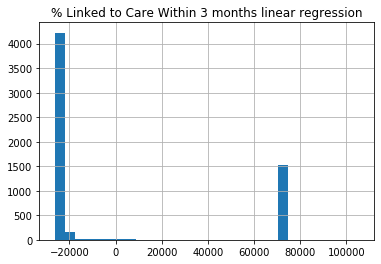

In [29]:
lm.resid.hist(bins = 30)
plt.title("% Linked to Care Within 3 months linear regression")

In [26]:
((hiv["% linked to care within 3 months"] - lm.fittedvalues)**2).mean()

1862237876.6136696